In [4]:
import os
import sys
import importlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [5]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [6]:
sys.path.append(join_path('EMIT-ECOSTRESS\\modules'))
import datasets.Datasets
import models.Feedforward
import utils.train
import utils.eval

In [7]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [8]:
base_data_path = 'Data\\Dataset\\Splits'
log_file_path = join_path(r'Miscellaneous\linear_benchmark_log.txt')

# load data

emit_train = pickle_load(
    os.path.join(base_data_path, 'reflectance_train_pca244.pkl')
)
emit_val = pickle_load(
    os.path.join(base_data_path, 'reflectance_val_pca244.pkl')
)

elev_train = pickle_load(
    os.path.join(base_data_path, 'elevation_train.pkl')
)
elev_val = pickle_load(os.path.join(base_data_path, 'elevation_val.pkl'))

elev_train = (
    (
        elev_train - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
elev_val = (
    (
        elev_val - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
eco_train = pickle_load(os.path.join(base_data_path, 'temp_train.pkl'))
eco_val = pickle_load(os.path.join(base_data_path, 'temp_val.pkl'))

In [9]:
benchmark_combos = [
    # (0, 0), (0, 1),
    # (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8),
    # (0, 10), (0, 12), (0, 16), (0, 24), (0, 32), (0, 48), (0, 64),
    # (0, 96), (0, 128), (0, 244),
    # (1, 2), (1, 3), (1, 4), (1, 8), (1, 16), (1, 32), (1, 48), (1, 64),
    # (2, 2), (2, 4), (2, 8), (2, 16), (2, 32), (2, 48),
    # (3, 2), (3, 4), (3, 8), (3, 16), (3, 32), (3, 48),
    # (4, 2), (4, 3), (4, 4), (4, 8), (4, 16), (4, 32), (4, 48),
    # (5, 2), (5, 3), (5, 4), (5, 8), (5, 16), (5, 32), (5, 48),
    # (6, 2), (6, 4), (6, 8), (6, 16), (6, 32),
    # (7, 2), (7, 4), (7, 8), (7, 16),
    # (8, 2), (8, 4), (8, 8), (8, 16),
    # (9, 2), (9, 4), (9, 8),
    # (10, 2), (10, 4), (10, 8),
    # (11, 2), (11, 4), (11, 6),
    (12, 2), (12, 3), (12, 4), (12, 5), (12, 6),
    # (13, 1), (13, 2), (13, 3), (13, 4), (13, 5),
    (14, 1), (14, 2), (14, 3), (14, 4), (14, 5),
    # (15, 1), (15, 2), (15, 3), (15, 4), (15, 5),
    (16, 1), (16, 2), (16, 3), (16, 4), (16, 5),
    # (17, 1), (17, 2), (17, 3), (17, 4), (17, 5),
    (18, 1), (18, 2), (18, 3), (18, 4), (18, 5),
    # (19, 1), (19, 2), (19, 3), (19, 4), (19, 5),
    (20, 1), (20, 2), (20, 3), (20, 4), (20, 5),
    # (21, 1), (21, 2), (21, 3), (21, 4), (21, 5),
    (22, 1), (22, 2), (22, 3), (22, 4), (22, 5),
    # (23, 1), (23, 2), (23, 3), (23, 4), (23, 5),
    (24, 1), (24, 2), (24, 3), (24, 4), (24, 5),
    (32, 1), (32, 2), (32, 3), (32, 4), (32, 5),
]

len(benchmark_combos)

40

In [10]:
benchmark_combos = [(9, 8)]

radius=12, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=1875, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4732,  4.3697   	 Val (RMSE, K):  1.1059,  2.9642   	LR:  0.001	Time: 77.5
Epoch 001:     Train (RMSE, K):  0.57385,  1.7022   	 Val (RMSE, K):  0.60038,  1.6093   	LR:  0.001	Time: 78.4


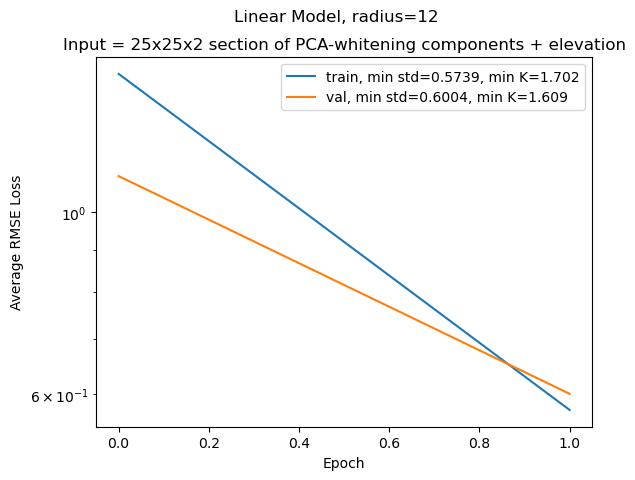

radius=12, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=2500, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.82203,  2.4383   	 Val (RMSE, K):  0.93412,  2.5039   	LR:  0.001	Time: 77.6
Epoch 001:     Train (RMSE, K):   0.573,  1.6997   	 Val (RMSE, K):  0.58504,  1.5681   	LR:  0.001	Time: 80.3


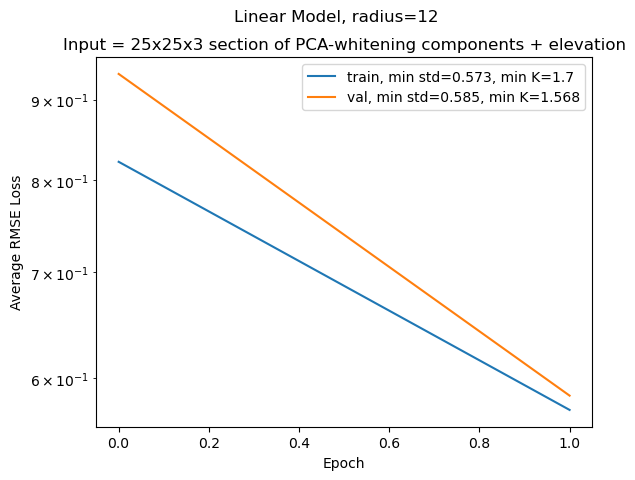

radius=12, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=3125, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.92771,  2.7518   	 Val (RMSE, K):  1.1706,  3.1378   	LR:  0.001	Time: 78.5
Epoch 001:     Train (RMSE, K):  0.57082,  1.6932   	 Val (RMSE, K):  0.57082,    1.53   	LR:  0.001	Time: 80.5


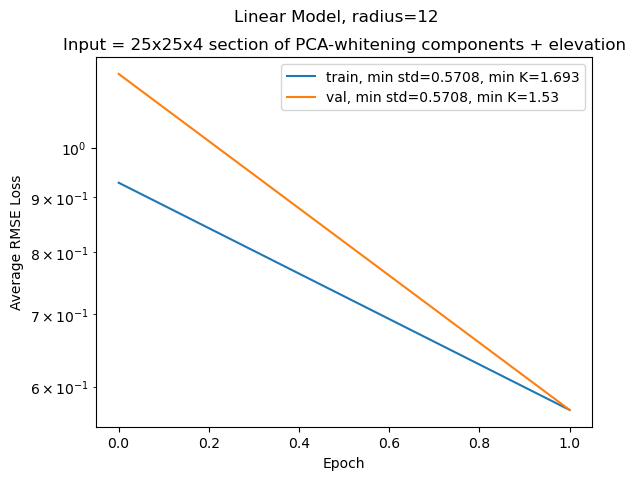

radius=12, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=3750, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3492,  4.0021   	 Val (RMSE, K):  1.0446,     2.8   	LR:  0.001	Time: 1.1e+02
Epoch 001:     Train (RMSE, K):  0.57884,   1.717   	 Val (RMSE, K):  0.66087,  1.7714   	LR:  0.001	Time: 1.13e+02


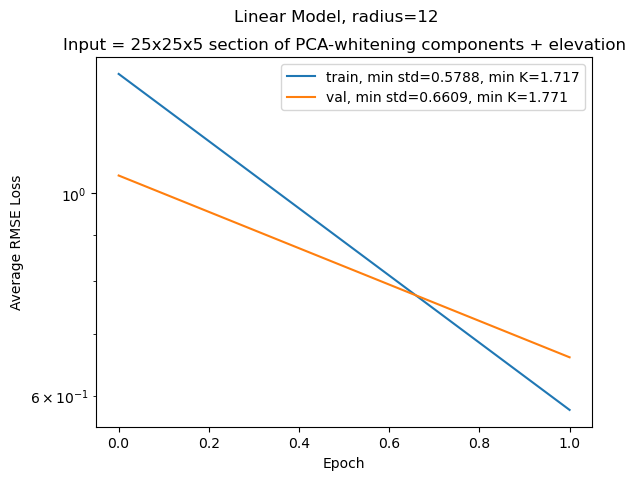

radius=12, n_components=6
 LinearModel(
  (linear_output): Linear(in_features=4375, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4624,  4.3379   	 Val (RMSE, K):  1.1612,  3.1126   	LR:  0.001	Time: 1.14e+02
Epoch 001:     Train (RMSE, K):  0.57402,  1.7027   	 Val (RMSE, K):  0.59784,  1.6025   	LR:  0.001	Time: 1.16e+02


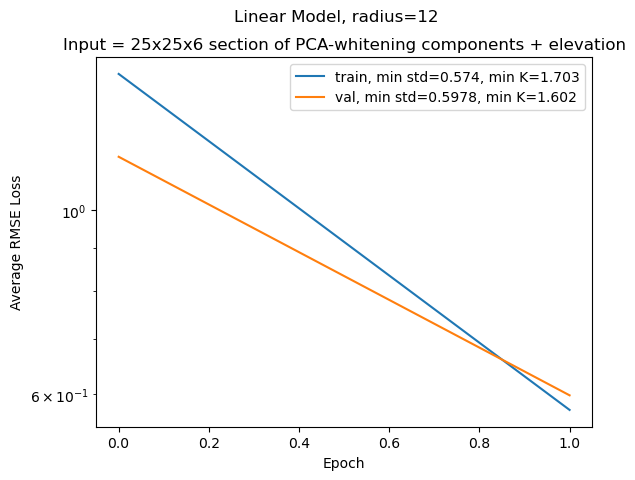

radius=14, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=1682, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.672,  4.9595   	 Val (RMSE, K):  1.3155,  3.5261   	LR:  0.001	Time: 94.8
Epoch 001:     Train (RMSE, K):  0.70563,  2.0931   	 Val (RMSE, K):  0.88726,  2.3782   	LR:  0.001	Time: 96.0


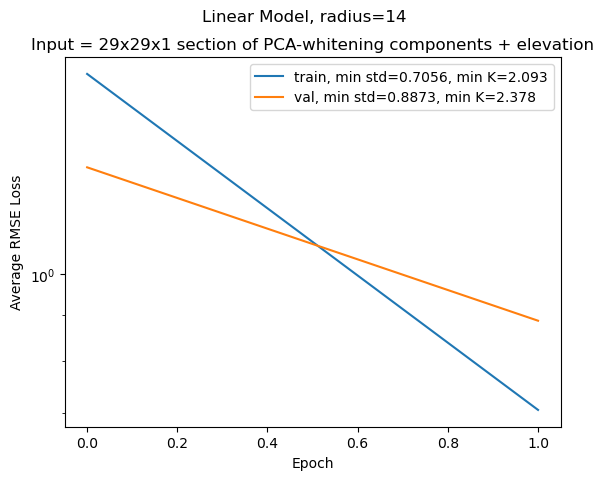

radius=14, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=2523, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1045,  3.2761   	 Val (RMSE, K):  1.0423,  2.7938   	LR:  0.001	Time: 99.4
Epoch 001:     Train (RMSE, K):  0.56925,  1.6885   	 Val (RMSE, K):  0.80865,  2.1675   	LR:  0.001	Time: 99.8


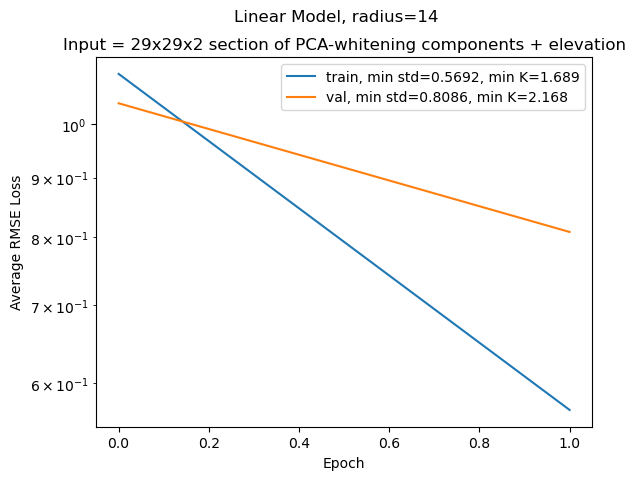

radius=14, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=3364, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1859,  3.5177   	 Val (RMSE, K):  1.0026,  2.6873   	LR:  0.001	Time: 1.01e+02
Epoch 001:     Train (RMSE, K):    0.58,  1.7204   	 Val (RMSE, K):   0.547,  1.4662   	LR:  0.001	Time: 1e+02


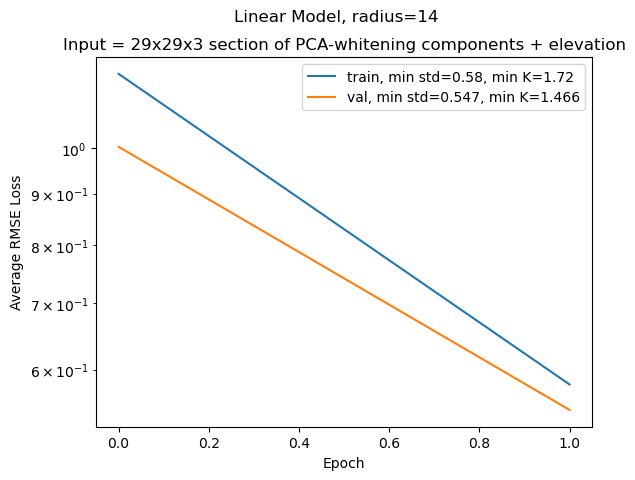

radius=14, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=4205, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.90635,  2.6884   	 Val (RMSE, K):  0.92776,  2.4868   	LR:  0.001	Time: 1.41e+02
Epoch 001:     Train (RMSE, K):  0.57836,  1.7155   	 Val (RMSE, K):  0.6538,  1.7525   	LR:  0.001	Time: 1.42e+02


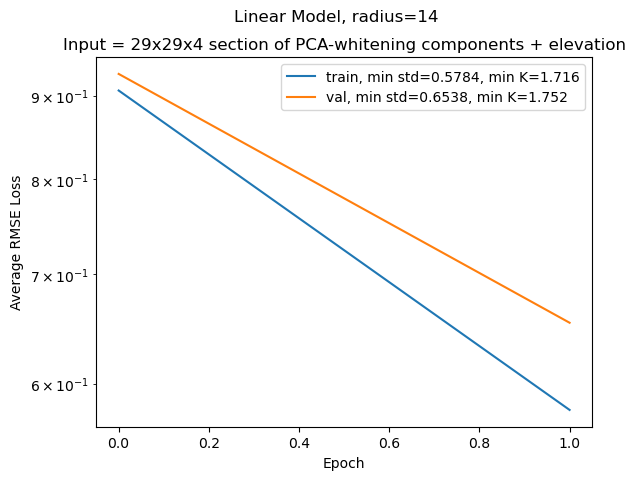

radius=14, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=5046, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2046,  3.5731   	 Val (RMSE, K):  1.1049,  2.9617   	LR:  0.001	Time: 1.4e+02
Epoch 001:     Train (RMSE, K):  0.58523,  1.7359   	 Val (RMSE, K):  0.67424,  1.8072   	LR:  0.001	Time: 1.44e+02


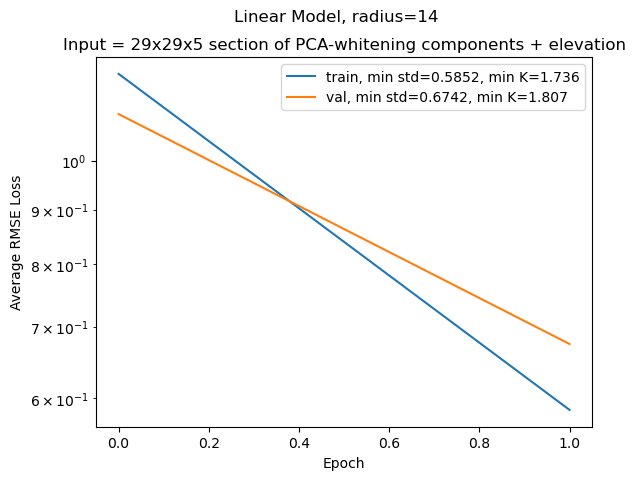

radius=16, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=2178, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.92679,  2.7491   	 Val (RMSE, K):  0.83822,  2.2468   	LR:  0.001	Time: 1.16e+02
Epoch 001:     Train (RMSE, K):  0.70104,  2.0794   	 Val (RMSE, K):  1.3138,  3.5215   	LR:  0.001	Time: 1.22e+02


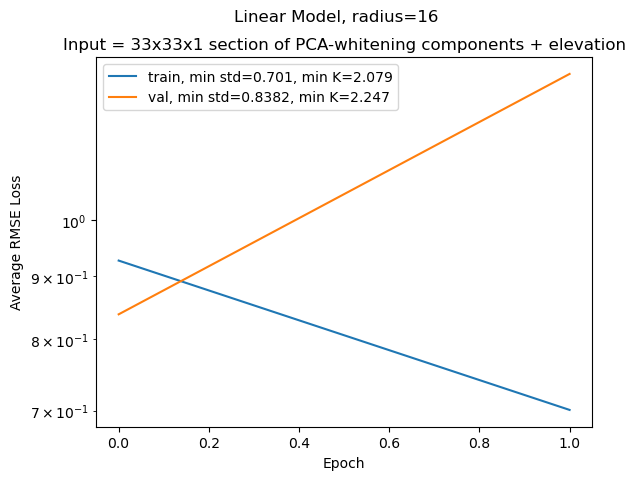

radius=16, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=3267, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0471,  3.1059   	 Val (RMSE, K):   1.083,  2.9029   	LR:  0.001	Time: 1.22e+02
Epoch 001:     Train (RMSE, K):  0.57537,  1.7067   	 Val (RMSE, K):  0.56244,  1.5076   	LR:  0.001	Time: 1.26e+02


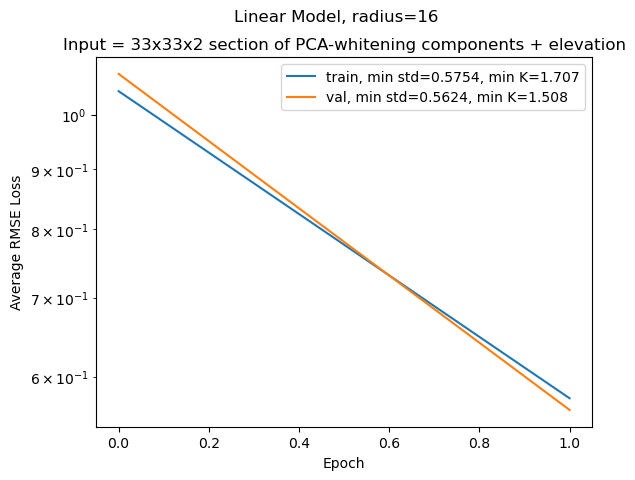

radius=16, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=4356, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3382,  3.9694   	 Val (RMSE, K):  1.0962,  2.9382   	LR:  0.001	Time: 1.66e+02
Epoch 001:     Train (RMSE, K):  0.58697,  1.7411   	 Val (RMSE, K):  0.54389,  1.4579   	LR:  0.001	Time: 1.66e+02


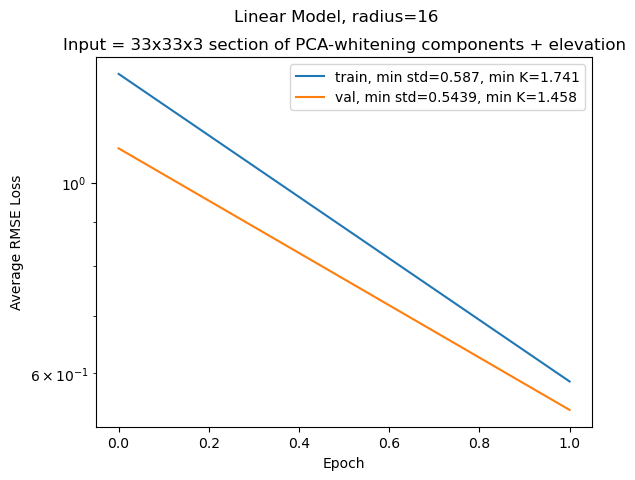

radius=16, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=5445, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0609,  3.1468   	 Val (RMSE, K):  0.97396,  2.6106   	LR:  0.001	Time: 1.58e+02
Epoch 001:     Train (RMSE, K):  0.58637,  1.7393   	 Val (RMSE, K):  0.56519,  1.5149   	LR:  0.001	Time: 1.62e+02


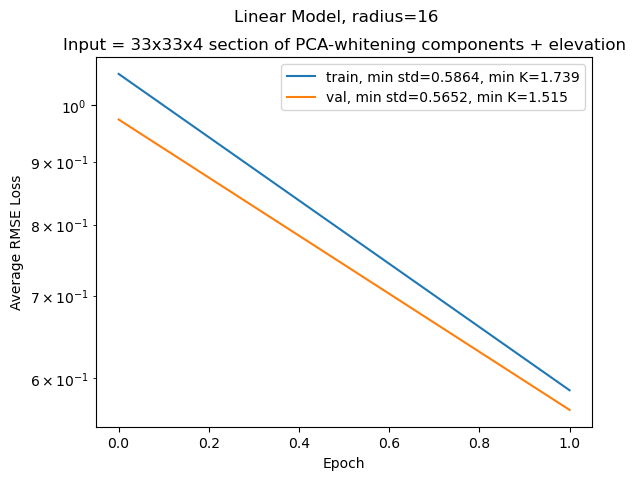

radius=16, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=6534, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.5167,  4.4989   	 Val (RMSE, K):  1.1743,  3.1477   	LR:  0.001	Time: 1.6e+02
Epoch 001:     Train (RMSE, K):  0.5923,  1.7569   	 Val (RMSE, K):  0.59188,  1.5865   	LR:  0.001	Time: 1.61e+02


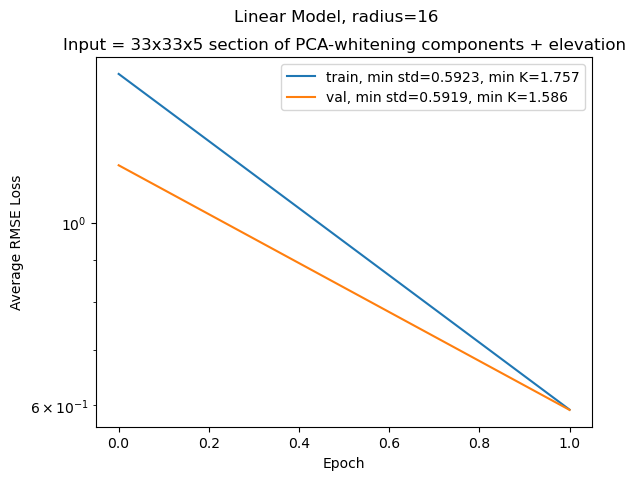

radius=18, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=2738, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.83519,  2.4774   	 Val (RMSE, K):  0.89097,  2.3882   	LR:  0.001	Time: 1.3e+02
Epoch 001:     Train (RMSE, K):  0.70076,  2.0786   	 Val (RMSE, K):  1.0032,  2.6889   	LR:  0.001	Time: 1.32e+02


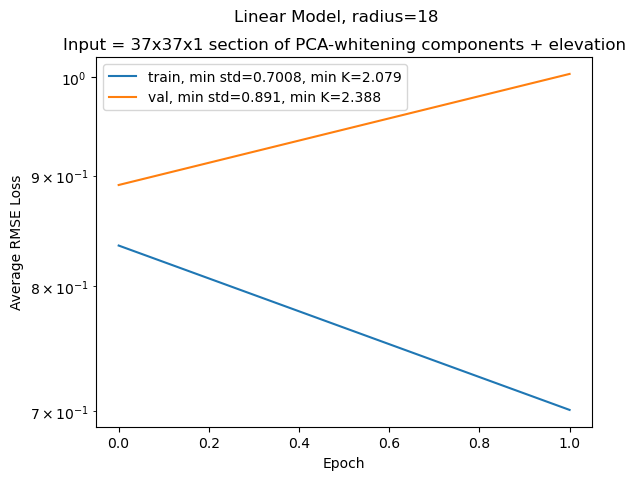

radius=18, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=4107, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.83566,  2.4788   	 Val (RMSE, K):  1.0313,  2.7644   	LR:  0.001	Time: 1.38e+02
Epoch 001:     Train (RMSE, K):  0.57922,  1.7181   	 Val (RMSE, K):  0.62977,   1.688   	LR:  0.001	Time: 1.4e+02


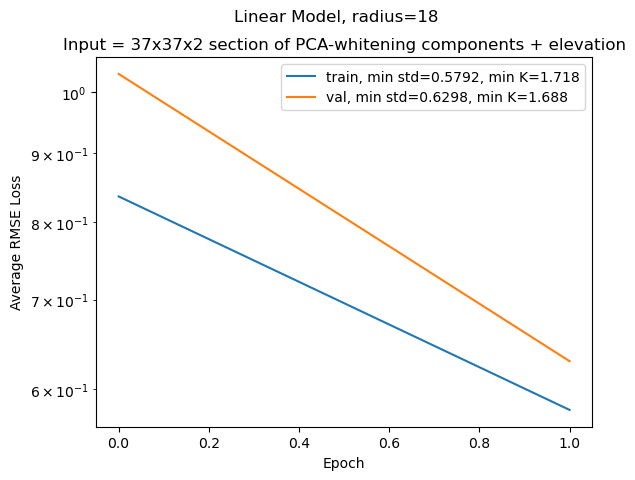

radius=18, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=5476, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0648,  3.1586   	 Val (RMSE, K):  1.0173,  2.7267   	LR:  0.001	Time: 1.77e+02
Epoch 001:     Train (RMSE, K):  0.59493,  1.7647   	 Val (RMSE, K):  0.56524,  1.5151   	LR:  0.001	Time: 1.82e+02


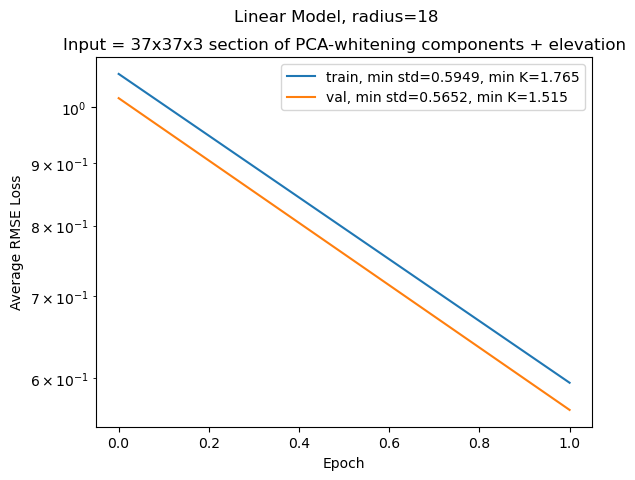

radius=18, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=6845, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.5607,  4.6293   	 Val (RMSE, K):   1.169,  3.1334   	LR:  0.001	Time: 1.81e+02
Epoch 001:     Train (RMSE, K):  0.60015,  1.7802   	 Val (RMSE, K):  0.62077,  1.6639   	LR:  0.001	Time: 1.81e+02


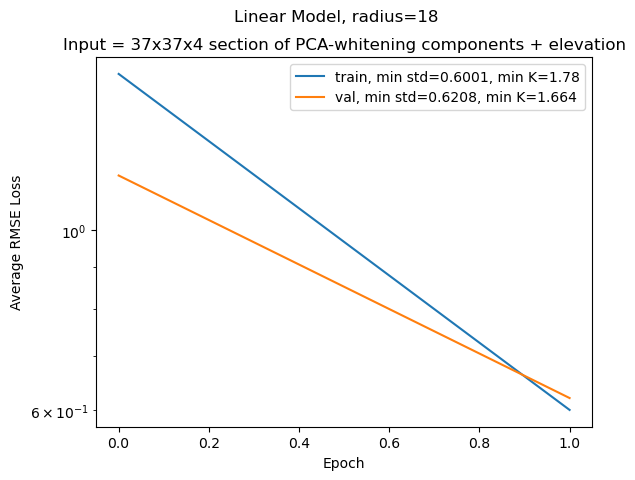

radius=18, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=8214, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.8987,  2.6657   	 Val (RMSE, K):  0.88655,  2.3763   	LR:  0.001	Time: 1.85e+02
Epoch 001:     Train (RMSE, K):  0.6092,   1.807   	 Val (RMSE, K):  0.55151,  1.4783   	LR:  0.001	Time: 1.86e+02


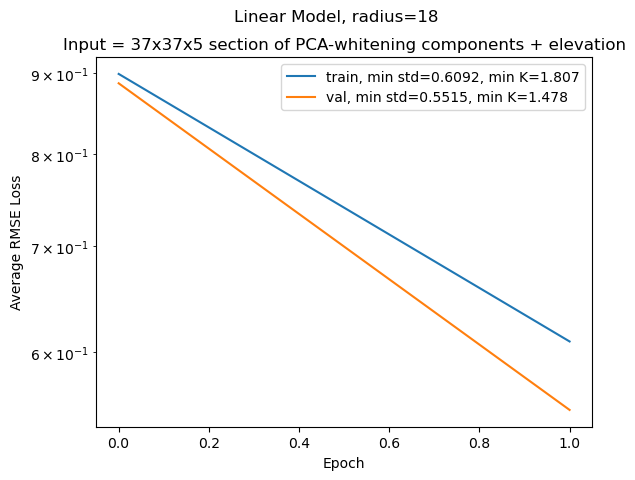

radius=20, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=3362, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  2.1494,  6.3757   	 Val (RMSE, K):  1.6356,  4.3841   	LR:  0.001	Time: 1.55e+02
Epoch 001:     Train (RMSE, K):  0.70891,  2.1028   	 Val (RMSE, K):  1.1802,  3.1635   	LR:  0.001	Time: 1.56e+02


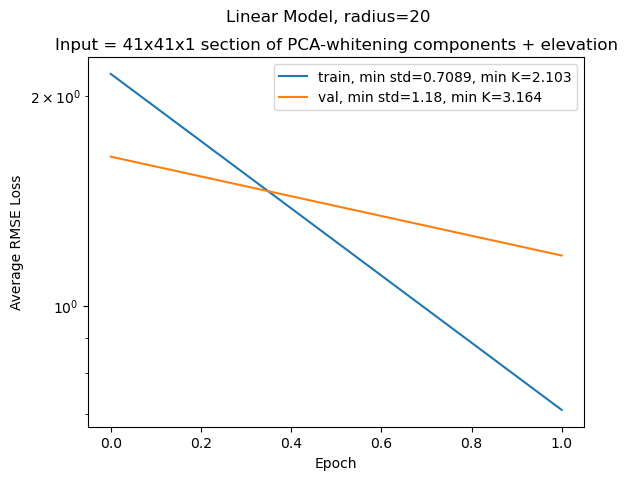

radius=20, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=5043, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.6201,  4.8055   	 Val (RMSE, K):  1.2853,   3.445   	LR:  0.001	Time: 2.01e+02
Epoch 001:     Train (RMSE, K):  0.58866,  1.7461   	 Val (RMSE, K):  0.53732,  1.4402   	LR:  0.001	Time: 2.01e+02


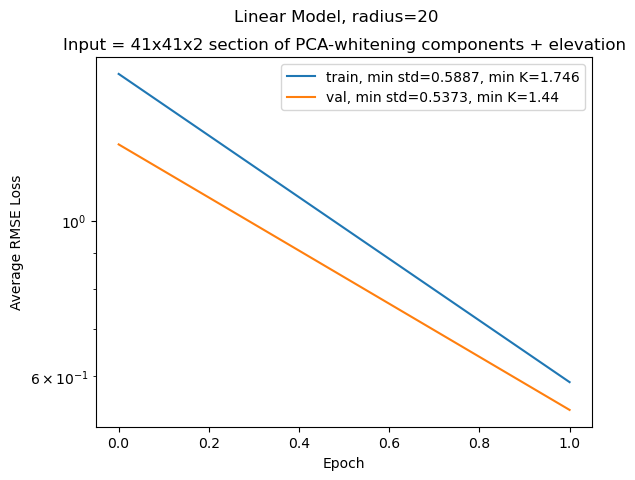

radius=20, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=6724, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.3901,  4.1233   	 Val (RMSE, K):  1.1963,  3.2067   	LR:  0.001	Time: 2.03e+02
Epoch 001:     Train (RMSE, K):  0.60725,  1.8013   	 Val (RMSE, K):  0.59523,  1.5955   	LR:  0.001	Time: 2.06e+02


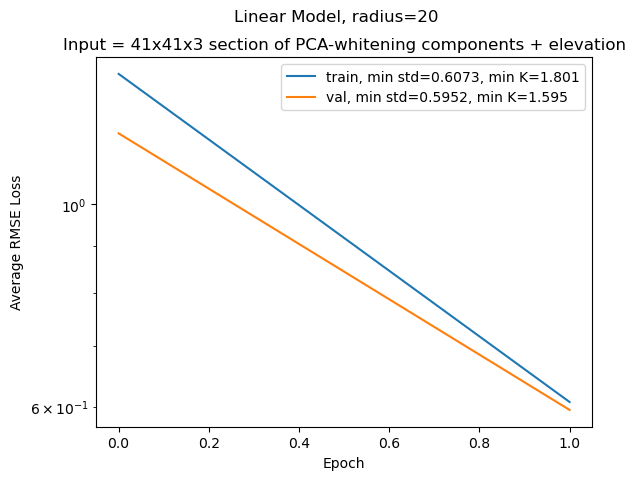

radius=20, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=8405, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.7998,  2.3724   	 Val (RMSE, K):  0.83597,  2.2408   	LR:  0.001	Time: 2.04e+02
Epoch 001:     Train (RMSE, K):  0.61871,  1.8352   	 Val (RMSE, K):  0.76805,  2.0587   	LR:  0.001	Time: 2.07e+02


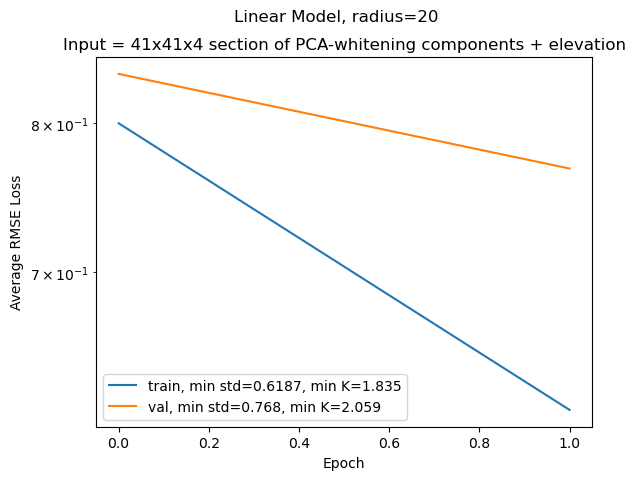

radius=20, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=10086, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0751,  3.1891   	 Val (RMSE, K):  0.97038,   2.601   	LR:  0.001	Time: 2.06e+02
Epoch 001:     Train (RMSE, K):  0.61953,  1.8377   	 Val (RMSE, K):  0.66468,  1.7816   	LR:  0.001	Time: 2.09e+02


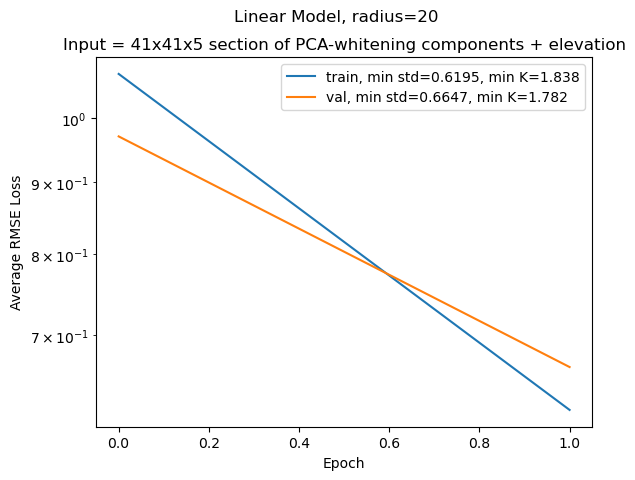

radius=22, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=4050, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.81524,  2.4182   	 Val (RMSE, K):  0.9824,  2.6333   	LR:  0.001	Time: 1.81e+02
Epoch 001:     Train (RMSE, K):  0.70897,   2.103   	 Val (RMSE, K):  1.1367,   3.047   	LR:  0.001	Time: 1.83e+02


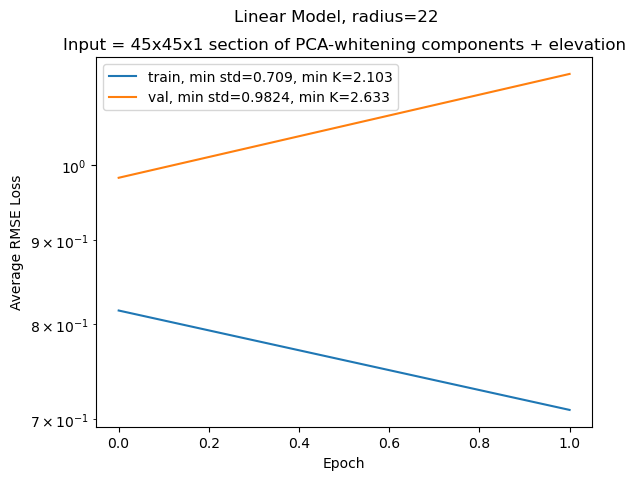

radius=22, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=6075, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.87727,  2.6022   	 Val (RMSE, K):  1.4517,  3.8911   	LR:  0.001	Time: 2.25e+02
Epoch 001:     Train (RMSE, K):  0.60463,  1.7935   	 Val (RMSE, K):  0.54513,  1.4612   	LR:  0.001	Time: 2.28e+02


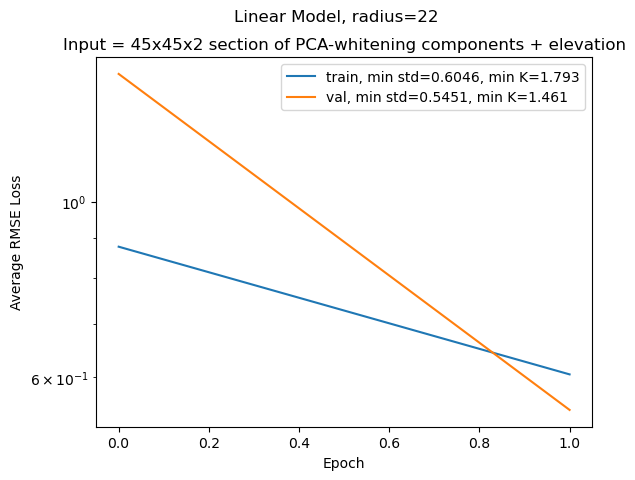

radius=22, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=8100, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.83109,  2.4652   	 Val (RMSE, K):  0.85523,  2.2924   	LR:  0.001	Time: 2.29e+02
Epoch 001:     Train (RMSE, K):  0.63025,  1.8695   	 Val (RMSE, K):  0.58597,  1.5706   	LR:  0.001	Time: 2.32e+02


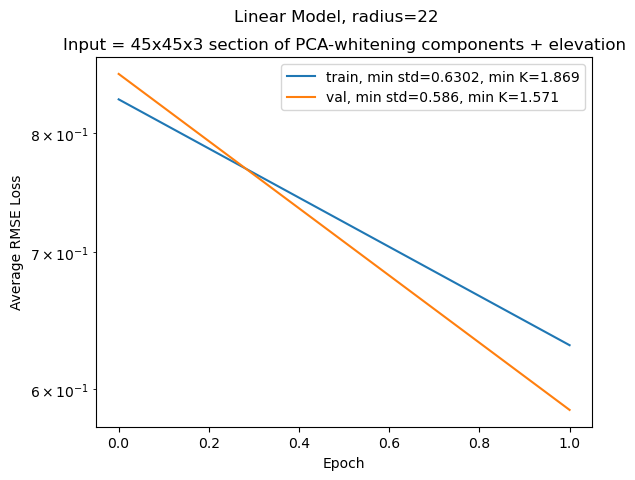

radius=22, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=10125, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.7188,  5.0984   	 Val (RMSE, K):  1.3065,   3.502   	LR:  0.001	Time: 2.34e+02
Epoch 001:     Train (RMSE, K):  0.63329,  1.8785   	 Val (RMSE, K):  0.67732,  1.8155   	LR:  0.001	Time: 2.34e+02


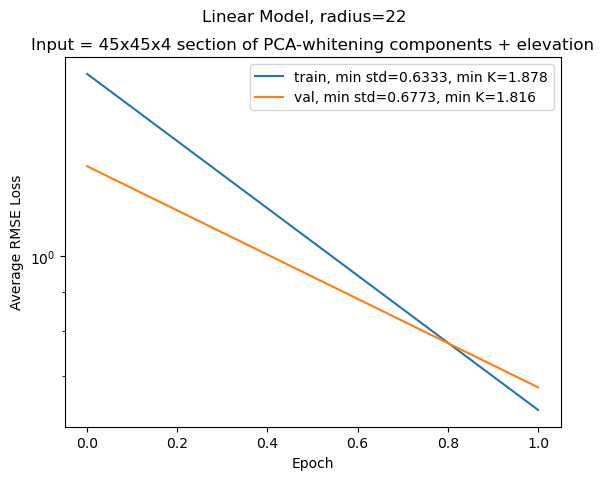

radius=22, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=12150, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0245,  3.0389   	 Val (RMSE, K):  1.1522,  3.0884   	LR:  0.001	Time: 2.4e+02
Epoch 001:     Train (RMSE, K):  0.66277,  1.9659   	 Val (RMSE, K):  0.76507,  2.0507   	LR:  0.001	Time: 2.43e+02


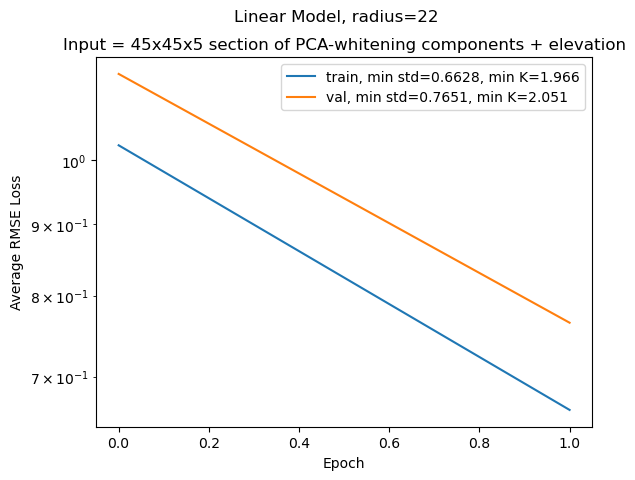

radius=24, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=4802, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.8687,  2.5768   	 Val (RMSE, K):  0.78665,  2.1086   	LR:  0.001	Time: 2.11e+02
Epoch 001:     Train (RMSE, K):  0.70208,  2.0825   	 Val (RMSE, K):  1.2119,  3.2485   	LR:  0.001	Time: 2.14e+02


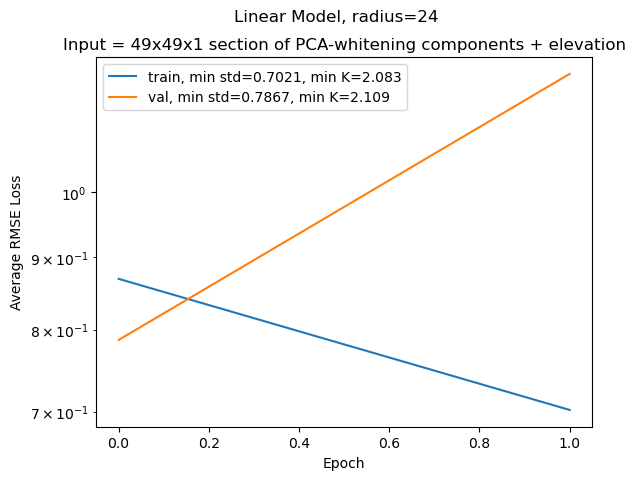

radius=24, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=7203, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2433,   3.688   	 Val (RMSE, K):   1.055,  2.8279   	LR:  0.001	Time: 2.57e+02
Epoch 001:     Train (RMSE, K):  0.6137,  1.8204   	 Val (RMSE, K):  0.66126,  1.7725   	LR:  0.001	Time: 2.57e+02


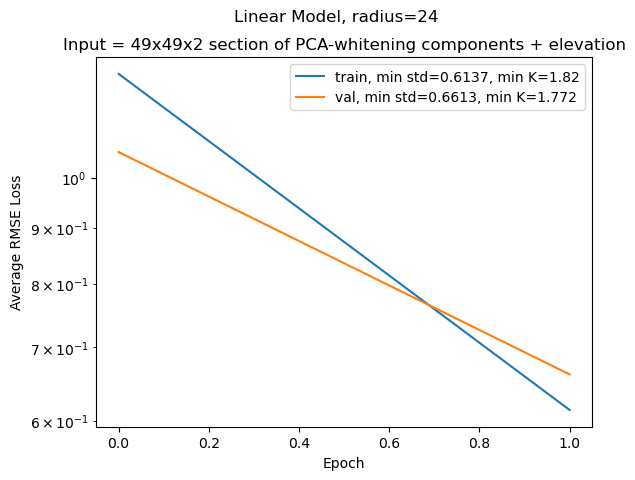

radius=24, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=9604, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.5319,  4.5439   	 Val (RMSE, K):   1.136,  3.0449   	LR:  0.001	Time: 2.62e+02
Epoch 001:     Train (RMSE, K):  0.6442,  1.9109   	 Val (RMSE, K):  0.6243,  1.6734   	LR:  0.001	Time: 2.62e+02


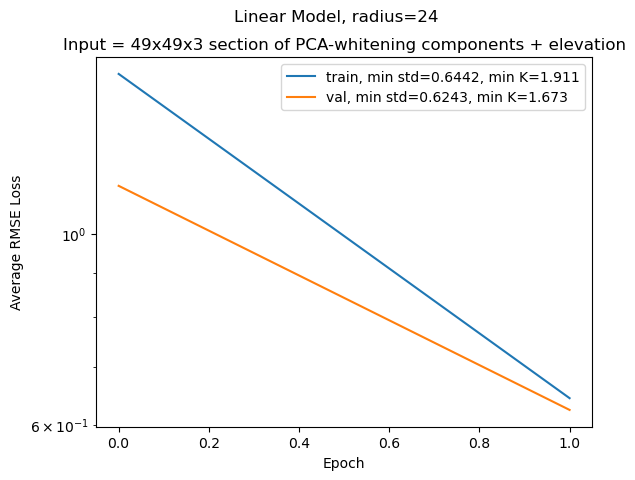

radius=24, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=12005, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1758,  3.4878   	 Val (RMSE, K):  1.0063,  2.6972   	LR:  0.001	Time: 2.67e+02
Epoch 001:     Train (RMSE, K):  0.65976,   1.957   	 Val (RMSE, K):  0.57352,  1.5373   	LR:  0.001	Time: 2.68e+02


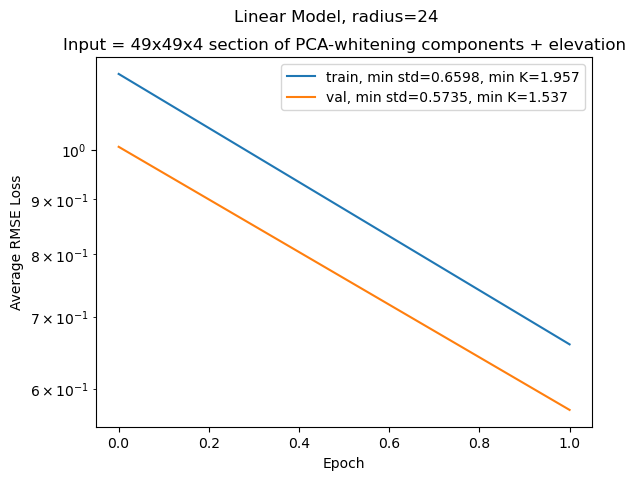

radius=24, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=14406, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2422,  3.6847   	 Val (RMSE, K):  1.2319,   3.302   	LR:  0.001	Time: 2.74e+02
Epoch 001:     Train (RMSE, K):  0.69766,  2.0694   	 Val (RMSE, K):  0.6192,  1.6597   	LR:  0.001	Time: 2.74e+02


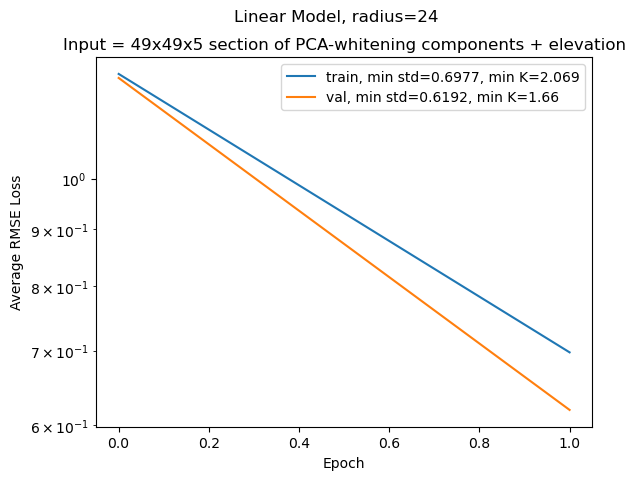

radius=32, n_components=1
 LinearModel(
  (linear_output): Linear(in_features=8450, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.1326,  3.3597   	 Val (RMSE, K):   1.003,  2.6884   	LR:  0.001	Time: 4.04e+02
Epoch 001:     Train (RMSE, K):  0.7305,  2.1668   	 Val (RMSE, K):  1.4863,  3.9838   	LR:  0.001	Time: 4.05e+02


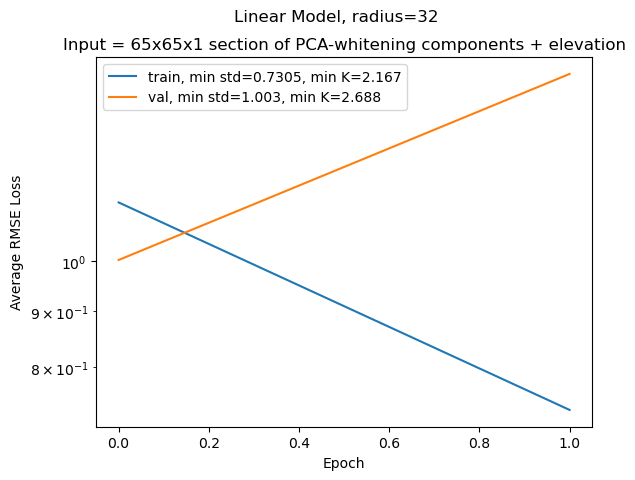

radius=32, n_components=2
 LinearModel(
  (linear_output): Linear(in_features=12675, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):   1.812,  5.3748   	 Val (RMSE, K):  1.1968,  3.2079   	LR:  0.001	Time: 4.12e+02
Epoch 001:     Train (RMSE, K):  0.68644,  2.0361   	 Val (RMSE, K):  0.64926,  1.7403   	LR:  0.001	Time: 4.21e+02


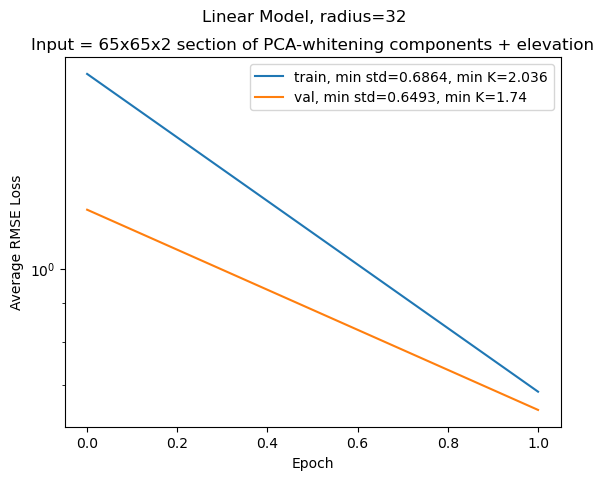

radius=32, n_components=3
 LinearModel(
  (linear_output): Linear(in_features=16900, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.8005,  2.3745   	 Val (RMSE, K):  0.90753,  2.4326   	LR:  0.001	Time: 4.3e+02
Epoch 001:     Train (RMSE, K):  0.75599,  2.2424   	 Val (RMSE, K):  0.63752,  1.7088   	LR:  0.001	Time: 4.25e+02


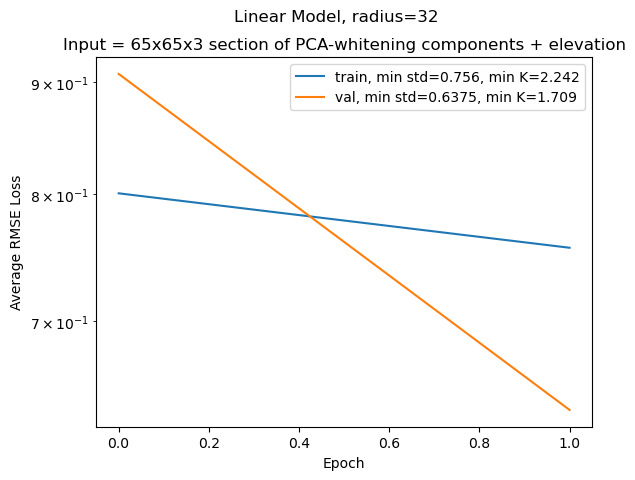

radius=32, n_components=4
 LinearModel(
  (linear_output): Linear(in_features=21125, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.4273,  4.2337   	 Val (RMSE, K):  1.1565,     3.1   	LR:  0.001	Time: 4.26e+02
Epoch 001:     Train (RMSE, K):  0.83975,  2.4909   	 Val (RMSE, K):  0.70461,  1.8886   	LR:  0.001	Time: 4.31e+02


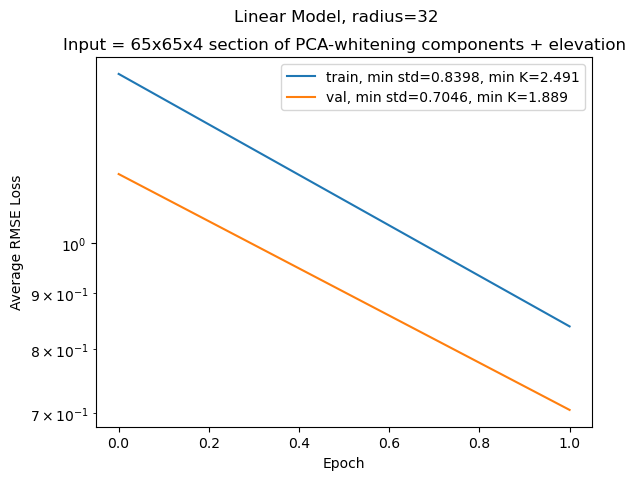

radius=32, n_components=5
 LinearModel(
  (linear_output): Linear(in_features=25350, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  0.93487,   2.773   	 Val (RMSE, K):  1.2554,  3.3649   	LR:  0.001	Time: 4.36e+02
Epoch 001:     Train (RMSE, K):  0.79776,  2.3663   	 Val (RMSE, K):  0.68067,  1.8245   	LR:  0.001	Time: 4.4e+02


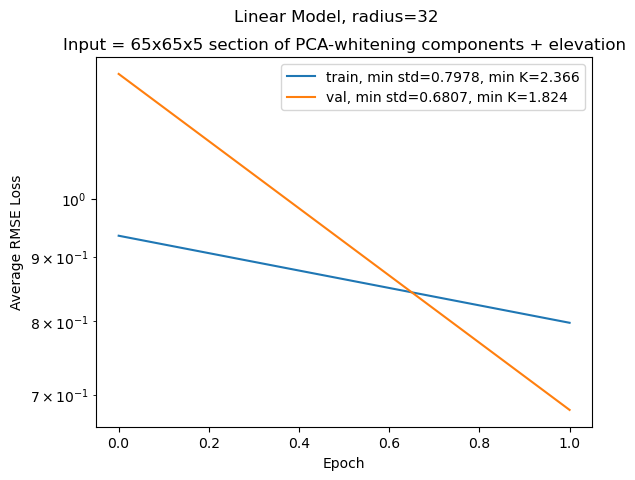

,radius,n_components,train_avg_std,train_std_std,train_std_min,train_std_0.5pct,train_std_2.5pct,train_std_16pct,train_std_25pct,train_std_50pct,...,val_K_0.5pct,val_K_2.5pct,val_K_16pct,val_K_25pct,val_K_50pct,val_K_75pct,val_K_84pct,val_K_97.5pct,val_K_99.5pct,val_K_max
0,12,2,0.573853,0.815833,6.556511e-07,0.003363,0.016210,0.103911,0.164021,0.347707,...,0.008774,0.044396,0.289591,0.455303,0.973656,1.750734,2.184458,3.737715,5.442267,8.969067
1,12,3,0.573001,0.803381,4.962087e-06,0.003175,0.015894,0.102658,0.162733,0.344892,...,0.009433,0.046552,0.292036,0.455124,0.960199,1.657679,2.068740,3.735026,5.603568,9.241026
2,12,4,0.570818,0.815274,1.013279e-06,0.003211,0.016153,0.103966,0.163051,0.346076,...,0.009391,0.049707,0.322179,0.504852,1.044709,1.705653,2.048376,3.462518,4.989830,8.477303
3,12,5,0.578839,0.822741,1.192093e-06,0.003426,0.016614,0.105704,0.165673,0.352181,...,0.009535,0.046659,0.308682,0.490365,1.106787,1.986375,2.485811,4.092549,5.255656,13.059793
4,12,6,0.574020,0.800433,4.172325e-07,0.003292,0.016374,0.106615,0.168715,0.357332,...,0.009183,0.044798,0.287605,0.454599,0.988833,1.786325,2.244594,3.671785,4.903651,8.858110
5,14,1,0.705631,1.143958,9.626150e-06,0.003933,0.020111,0.129220,0.202828,0.420330,...,0.018919,0.096636,0.609010,0.939310,1.850437,2.845046,3.282406,4.886040,6.146324,9.289608
6,14,2,0.569245,0.805892,4.172325e-06,0.003231,0.015949,0.103939,0.163564,0.348578,...,0.012348,0.061644,0.393381,0.633143,1.427291,2.487754,3.014674,4.837112,6.622967,10.680418
7,14,3,0.579998,0.805144,1.996756e-06,0.003230,0.016251,0.104455,0.164555,0.350500,...,0.008452,0.043052,0.280438,0.443411,0.936499,1.588451,1.959890,3.495837,4.840493,8.005818
8,14,4,0.578356,0.823842,2.056360e-06,0.003317,0.016587,0.105552,0.166486,0.351438,...,0.009782,0.047553,0.305281,0.487555,1.049850,1.877222,2.359786,4.121377,6.071898,12.630452
9,14,5,0.585226,0.830453,2.831221e-07,0.003217,0.016165,0.106033,0.167035,0.354525,...,0.009499,0.049937,0.318664,0.501990,1.082211,1.982723,2.514010,4.160422,5.722351,13.737374


In [10]:
importlib.reload(datasets.Datasets)
importlib.reload(models.Feedforward)
importlib.reload(utils.train)
importlib.reload(utils.eval)

batch_size = 256
val_batch_size = 1024

n_epochs = 1
dropout_rate = 0

stats_list = []
train_loss_array_list = []
val_loss_array_list = []
train_loss_list = []
val_loss_list = []

stats = None
print('Start Training', file=open(log_file_path, 'w'))
try:
    for combo in benchmark_combos:
        radius, n = combo

        omit_components = 244 - n

        # create datasets and dataloaders

        train_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_train,
            omit_components=omit_components,
            ecostress_data=eco_train,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_train,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        val_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_val,
            omit_components=omit_components,
            ecostress_data=eco_val,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_val,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        if batch_size is not None:
            train_loader = DataLoader(
                dataset=train_dataset,
                batch_size=batch_size,
                drop_last=False,
                shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset,
                batch_size=val_batch_size,
                drop_last=False,
                shuffle=False,
            )
        else:
            train_loader = DataLoader(
                dataset=train_dataset, batch_size=batch_size, shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset, batch_size=batch_size, shuffle=False,
            )
            
        
        model = models.Feedforward.LinearModel(
            input_dim=train_dataset.input_dim,
            radius=radius,
            dropout_rate=dropout_rate,
        )
        
        if device == 'cuda':
            model = model.cuda()

        optimizer = optim.Adam(
            params=model.parameters(), lr=0.001, weight_decay=0, fused=True
        )

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=optimizer, factor=0.2, patience=2
        )

        loss_fn = nn.MSELoss(reduction='sum')

        print(f'radius={combo[0]}, n_components={combo[1]}\n', model)
        print(
            f'radius={combo[0]}, n_components={combo[1]}\n',
            model,
            file=open(log_file_path, 'a'),
        )
        
        train_loss, val_loss, eval_stats, train_loss_array, val_loss_array = (
            utils.train.train(
                model,
                optimizer,
                scheduler,
                loss_fn,
                train_loader,
                val_loader,
                n_epochs=n_epochs,
                loss_interval=1,
                # preexisting_losses=[train_loss, val_loss],
                device=device,
                log_file_path=log_file_path,
            )
        )
        
        eval_stats = np.concatenate([np.array(combo), eval_stats])
        stats_list.append(eval_stats)
        train_loss_array_list.append(train_loss_array)
        val_loss_array_list.append(val_loss_array)
        train_loss_list.append(train_loss)
        val_loss_array_list.append(val_loss)
        
        
        fig, ax = plt.subplots()
        fig.suptitle(
            f'Linear Model, radius={radius}'
        )
        l = 2 * radius + 1
        ax.set_title(
            f'Input = {l}x{l}x{244 - omit_components} section of '
            'PCA-whitening components + elevation'
        )
        ax.semilogy(
            np.arange(len(train_loss)),
            train_loss,
            label=(
                'train, '
                f'min std={min(train_loss):.4}, '
                f'min K={train_dataset.ecostress_scale * min(train_loss):.4}'
            ),
        )
        ax.semilogy(
            np.arange(len(val_loss)),
            val_loss,
            label=(
                'val, '
                f'min std={min(val_loss):.4}, '
                f'min K={val_dataset.ecostress_scale * min(val_loss):.4}'
            ),
        )
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Average RMSE Loss')
        ax.legend()
        plt.show(fig)
        
        torch.save(
            model.state_dict(),
            join_path(f'Data\\Models\\linear_r{radius}_n{n}.pt')
        )
        
    stats = np.array(stats_list)
    stats_columns = utils.eval.initialize_eval_results().columns.to_list()
    stats = pd.DataFrame(stats, columns=stats_columns)
    stats['radius'] = stats['radius'].astype(int)
    stats['n_components'] = stats['n_components'].astype(int)
        
except KeyboardInterrupt:
    print('Training was interrupted by user')
    print('Training was interrupted by user', file=open(log_file_path, 'a'))

stats

In [11]:
stats.to_csv(join_path(r'Miscellaneous\linear_benchmarking_pca_temp.csv'))

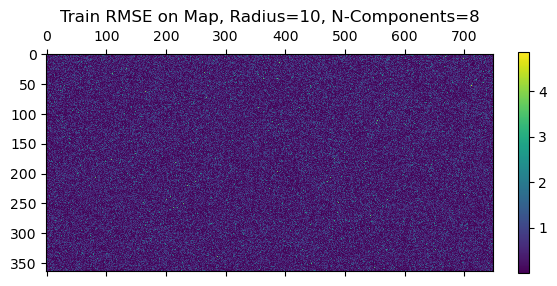

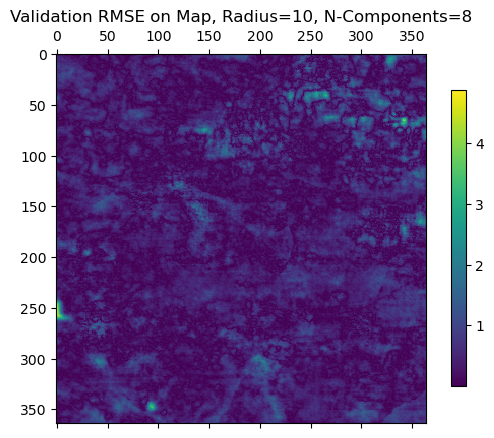

In [25]:
fig, ax = plt.subplots()
ax.set_title('Train RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.6)
ax.matshow(train_loss_array)
plt.show(fig)
fig, ax = plt.subplots()
ax.set_title('Validation RMSE on Map, Radius=10, N-Components=8')
plt.imshow(train_loss_array)
plt.colorbar(fraction=0.05, shrink=0.8)
ax.matshow(val_loss_array)
plt.show(fig)

In [ ]:
n_components_benchmark_radii = [0]
#[0, 1, 3, 8, 16]
n_components_benchmark_n_components = [1, 2, 3, 4, 5, 8, 10, 12, 16,]
#[1, 2, 3, 4, 8, 16, 32, 64, 128, 244]

radius_benchmark_radii = []#[0, 1, 2, 3, 4, 8, 16]
radius_benchmark_n_components = []#[8, 16, 32, 64, 244]

benchmark_combos = []
for radius in n_components_benchmark_radii:
    for n in n_components_benchmark_n_components:
        benchmark_combos.append((radius, n))

for radius in radius_benchmark_radii:
    for n in radius_benchmark_n_components:
        if (radius, n) in benchmark_combos:
            continue
        else:
            benchmark_combos.append((radius, n))

len(benchmark_combos)

1